### Primer Random Fores con Scikit-Learn

In [79]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [80]:
# Cargamos el dataset que queremos utilizar. 
df_diabetes = pd.read_csv("C:\\Users\\abuen\\OneDrive\\00 - BUSINNESS INTELLIGENCE\\MODULO_2\\DATASET\\pima-indians-diabetes.csv", sep=",")
df_diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


### Analisis Exploratorio de Datos 

In [81]:
df_diabetes.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
586,6,103,66,0,0,24.3,0.249,29,0
733,2,105,75,0,0,23.3,0.560,53,0
339,1,130,70,13,105,25.9,0.472,22,0
765,1,126,60,0,0,30.1,0.349,47,1
150,4,114,65,0,0,21.9,0.432,37,0
735,0,126,86,27,120,27.4,0.515,21,0
127,1,117,88,24,145,34.5,0.403,40,1
467,8,120,0,0,0,30.0,0.183,38,1
512,2,91,62,0,0,27.3,0.525,22,0
458,9,134,74,33,60,25.9,0.460,81,0


In [82]:
# Renombramos las columnas 
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [83]:
#Verificacion de datos
df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [84]:
# Analizamos el shape del objeto 
print(df_diabetes.shape)

(767, 9)


In [85]:
# Analizamos el tipo de datos 
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

### Enternamiendo de Random Forest con Scikit-Learn 

In [86]:
# Separamos X e y 
X = df_diabetes.drop("9. Class variable (0 or 1)", axis = 1) 
y = df_diabetes[("9. Class variable (0 or 1)")]

In [87]:
# Importamos las librerias necesarias para la creacion del modelo 
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=00000)

In [88]:
# Crear el modelo de Arbo de decision 
from sklearn.ensemble import RandomForestClassifier

# Creacion del modelo 
random_forest = RandomForestClassifier(n_estimators=20, random_state=00000)

In [89]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [90]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

### Evaluacion del modelo

In [91]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es:', train_accuracy)
print('El accuracy en test es:', test_accuracy)

El accuracy en train es: 0.996268656716418
El accuracy en test es: 0.7532467532467533


In [92]:
# VErificacion del features imporances 
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importances": random_forest.feature_importances_}).sort_values("importances", ascending=False)

# Mostrar 
feature_importances_df

,feature,importances
1,2. Plasma glucose concentration a 2 hours in a...,0.219213
5,6. Body mass index (weight in kg/(height in m)^2),0.196958
6,7. Diabetes pedigree function,0.136802
7,8. Age (years),0.117454
2,3. Diastolic blood pressure (mm Hg),0.088821
4,5. 2-Hour serum insulin (mu U/ml),0.084842
0,1. Number of times pregnant,0.083936
3,4. Triceps skin fold thickness (mm),0.071975


In [93]:
print(feature_importances_df.columns)


Index(['feature', 'importances'], dtype='object')


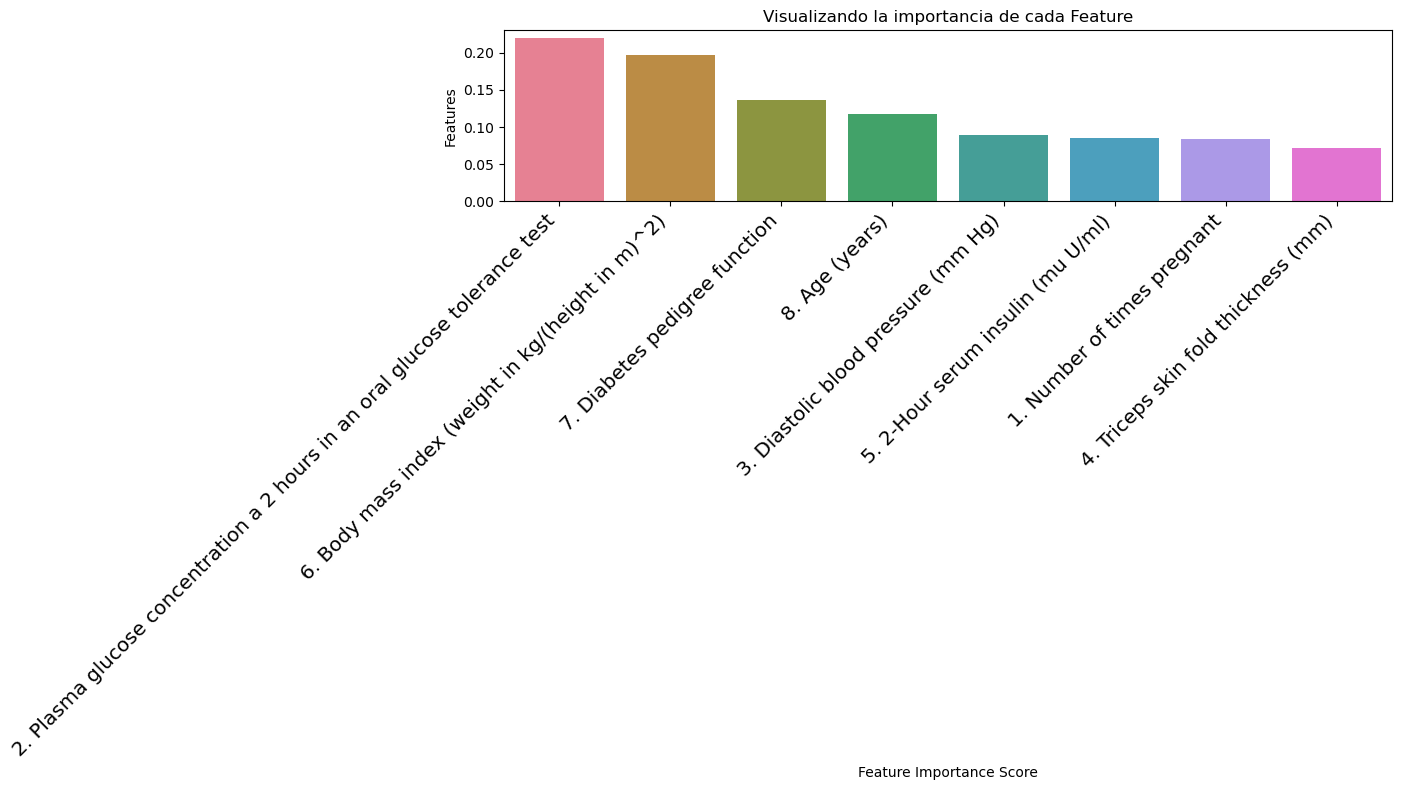

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))  # más ancho y alto
sns.barplot(
    x="feature",
    y="importances",
    hue="feature",
    data=feature_importances_df,
    palette="husl",
    legend=False
)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.tight_layout()
plt.show()
